In [86]:
# Importanod bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns


In [ ]:
# Importanod bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns


In [ ]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'


In [22]:
# Importando base volume
file_volume = 'volume_amaciante.csv'
df_volume = pd.read_csv('volume_amaciante.csv')
display(df_volume)
df_volume.info()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8
...,...
995,1000.0
996,1000.4
997,999.9
998,1000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Volume  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [ ]:
# Gerando estatistica descritiva
df_volume.describe()

In [ ]:
# Importando base sabao
file_medidas_sabao = 'medidas_sabao_em_po.csv'
df_medidas = pd.read_csv(file_medidas_sabao)
display(df_medidas)
df_medidas.info()

<Axes: title={'left': 'Distribuição de volume de amaciante\npara 1000 amostras'}, xlabel='Volume em ml', ylabel='Quantidade'>

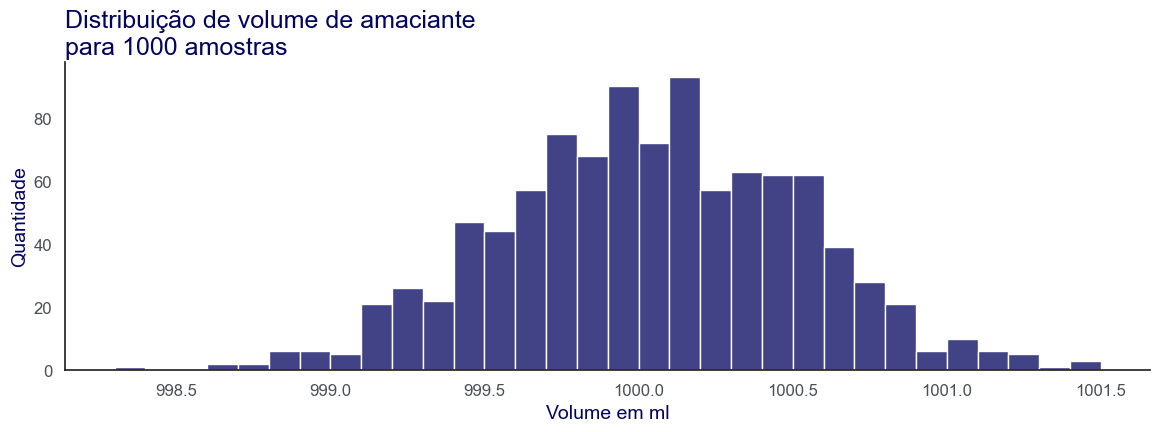

In [ ]:
#   ax = sns.histplot(data=df_volume, x='Volume', bins=20, color=AZUL1)

def distribuicao_volume_amaciante():
    
    fig, ax = plt.subplots(figsize=(14,4))
    sns.set_theme(style='white')
    
    ax = sns.histplot(data=df_volume, x='Volume', binwidth=0.1, color=AZUL1)
    plt.title('Distribuição de volume de amaciante\npara 1000 amostras', fontsize=18, color=AZUL1, loc='left')
    ax.set_xlabel('Volume em ml', fontsize=14, color=AZUL1)
    ax.set_ylabel('Quantidade', fontsize=14, color=AZUL1)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    sns.despine()
    
    plt.savefig('Distruibuição de volume.png')
    return ax

distribuicao_volume_amaciante()


<Axes: title={'left': 'Gráfico de densidade do volume'}, xlabel='Volume em ml', ylabel='Densidade'>

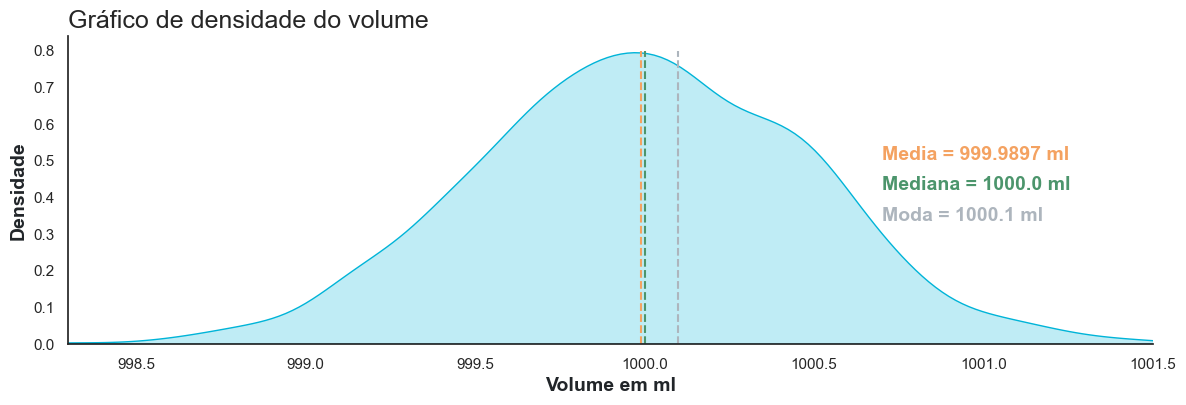

In [83]:
def grafico_densidade():
    fig, ax = plt.subplots(figsize=(14,4))
    sns.set_theme(style='white')
    
    
    ax = sns.kdeplot(data=df_volume, x='Volume', color=AZUL3, lw=1, fill=True)
    plt.title('Gráfico de densidade do volume', fontsize=18, loc='left')
    sns.despine()
    ax.set_xlabel('Volume em ml', fontsize=14, color=CINZA1, fontweight='bold')
    ax.set_ylabel('Densidade', fontsize=14, color=CINZA1, fontweight='bold')
    ax.set_xlim(df_volume.Volume.min(),df_volume.Volume.max())
    
    
    estat = df_volume.Volume.mean(), df_volume.Volume.median(), df_volume.Volume.mode()[0] 
    desc = ['Media', 'Mediana', 'Moda'] 
    cores = [LARANJA1, VERDE1,CINZA3]
    
    ax.vlines(x= estat, ymin= 0, ymax=0.8, colors=cores, linestyles='--')
    
    for i in range(len(estat)):
        ax.text(0.75, (0.6 - i/10), f'{desc[i]} = {estat[i]} ml', fontsize=14, color= cores[i], transform = ax.transAxes, fontweight='bold')
    
    plt.savefig('Grafico de densidade.png')
    return ax

grafico_densidade()
    

<Axes: title={'left': 'para uma amostra de 1000 unidades'}, ylabel='Volume (ml)'>

c:\Users\larag\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


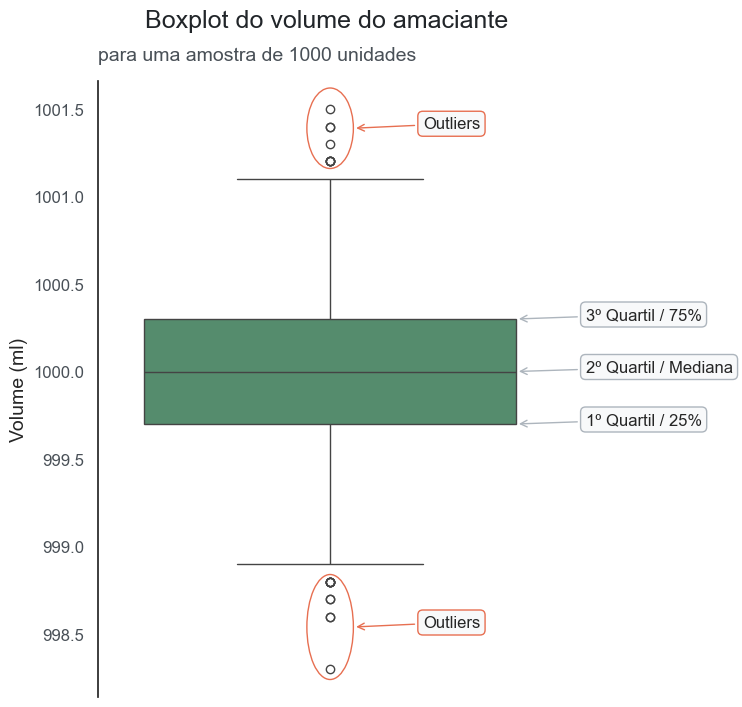

In [94]:
def boxplot():
    
    fig, ax = plt.subplots(figsize=(6,8))
    sns.set_theme(style='white')
    
    ax = sns.boxplot(data= df_volume, y='Volume',orient='v', color=VERDE1)
    plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
    plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
    ax.set_xlabel('')
    ax.set_ylabel('Volume (ml)', fontsize = 14)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
    sns.despine(bottom=True)
        
    # Gerando outros elementos visuais (elipses dos outliers)
    y_min, y_max = ax.get_ybound()
    outlier_sup = Ellipse((0, y_max - 0.27), width = 0.1, height = 0.46, color=VERMELHO1, fill=False)
    outlier_inf = Ellipse((0, y_min + 0.4), width = 0.1, height = 0.6, color=VERMELHO1, fill=False)
    ax.add_patch(outlier_sup)
    ax.add_patch(outlier_inf)



    # Adicionando a explicação dos elementos de um boxplot
    ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.27), xycoords='data',    # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),            # caixa de texto
            xytext=(50, 0), textcoords='offset points',                      # posição do texto
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))               # propriedades da seta

    ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))
    
    ax.annotate("1º Quartil / 25%", xy=(0.4, df_volume.quantile(.25)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

    ax.annotate("2º Quartil / Mediana", xy=(0.4, df_volume.median()), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

    ax.annotate("3º Quartil / 75%", xy=(0.4, df_volume.quantile(.75)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

        plt.savefig('Boxplot de volume de amaciante.png')
    
    return ax

boxplot()